# Lambda School Data Science Module 123

### The Monty Hall Problem:

![The Monty Hall Problem](https://raw.githubusercontent.com/ryanleeallred/lecture-images/master/monty-hall-doors.png)

## Introduction to Bayesian Inference

!['Detector! What would the Bayesian statistician say if I asked him whether the--' [roll] 'I AM A NEUTRINO DETECTOR, NOT A LABYRINTH GUARD. SERIOUSLY, DID YOUR BRAIN FALL OUT?' [roll] '... yes.'](https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png)

*[XKCD 1132](https://www.xkcd.com/1132/)*


## Prepare - Bayes' Theorem and the Bayesian mindset

Bayes' theorem possesses a near-mythical quality - a bit of math that somehow magically evaluates a situation. But this mythicalness has more to do with its reputation and advanced applications than the actual core of it - deriving it is actually remarkably straightforward.

### The Law of Total Probability

By definition, the total probability of all outcomes (events) if some variable (event space) $A$ is 1. That is:

$$P(A) = \sum_n P(A_n) = 1$$

The law of total probability takes this further, considering two variables ($A$ and $B$) and relating their marginal probabilities (their likelihoods considered independently, without reference to one another) and their conditional probabilities (their likelihoods considered jointly). A marginal probability is simply notated as e.g. $P(A)$, while a conditional probability is notated $P(A|B)$, which reads "probability of $A$ *given* $B$".

The law of total probability states:

$$P(A) = \sum_n P(A | B_n) P(B_n)$$

In words - the total probability of $A$ is equal to the sum of the conditional probability of $A$ on any given event $B_n$ times the probability of that event $B_n$, and summed over all possible events in $B$.





### The Law of Conditional Probability

What's the probability of something conditioned on something else? To determine this we have to go back to set theory and think about the intersection of sets:

The formula for actual calculation:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

![Visualization of set intersection](https://upload.wikimedia.org/wikipedia/commons/9/99/Venn0001.svg)

Think of the overall rectangle as the whole probability space, $A$ as the left circle, $B$ as the right circle, and their intersection as the red area. Try to visualize the ratio being described in the above formula, and how it is different from just the $P(A)$ (not conditioned on $B$).

We can see how this relates back to the law of total probability - multiply both sides by $P(B)$ and you get $P(A|B)P(B) = P(A \cap B)$ - replaced back into the law of total probability we get $P(A) = \sum_n P(A \cap B_n)$.

This may not seem like an improvement at first, but try to relate it back to the above picture - if you think of sets as physical objects, we're saying that the total probability of $A$ given $B$ is all the little pieces of it intersected with $B$, added together. The conditional probability is then just that again, but divided by the probability of $B$ itself happening in the first place.


### Bayes Theorem

Here it is, the seemingly magic tool:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In words - the probability of $A$ conditioned on $B$ is the probability of $B$ conditioned on $A$, times the probability of $A$ and divided by the probability of $B$. These unconditioned probabilities are referred to as "prior beliefs", and the conditioned probabilities as "updated."

Why is this important? Scroll back up to the XKCD example - the Bayesian statistician draws a less absurd conclusion because their prior belief in the likelihood that the sun will go nova is extremely low. So, even when updated based on evidence from a detector that is $35/36 = 0.972$ accurate, the prior belief doesn't shift enough to change their overall opinion.

### Using Bayes Theorem Iteratively (repeated testing)

This example comes from [Wikipedia](https://en.wikipedia.org/wiki/Bayes%27_theorem)

There are many ways to apply Bayes' theorem - one less absurd example is to apply it to coronavirus tests. You may think that a coronavirus test that is 100% accurate for true positives (detecting somebody who has it) is pretty good, but what if it also has 1% false positive rate (indicating somebody has it when they're really don't)? And furthermore, the current rate of infection in the population at large (and thus our prior belief) is 1/200.

What is the likelihood somebody really has coronavirus if they test positive? Some may guess it's 99% - the difference between the true positives and the false positives. But we have a prior belief of the background/true rate infection. Sounds like a job for Bayes' theorem!

\begin{align}
P(\text{Infected}|+) = \frac{P(+|\text{Infected})P(\text{Infected})}{P(+)}
\newline
\newline
\end{align}


\begin{align}
= \frac{P(+|\text{Infected})P(\text{Infected})}{P(+|\text{Infected})P(\text{Infected}) + P(+|\text{Not-Infected})P(\text{Not-Infected})}
\end{align}


\begin{align}
=\frac{?}{?}
\newline
\newline
\end{align}

\begin{align}
=?
\end{align}

In other words, the likelihood that somebody is infected given they tested positive is only... [] ... - probably much lower than you'd guess. This is why, in practice, it's important to use repeated testing to confirm. If we have the same individual who tested positive the first time take the coronavirus test a second time then the posterior probability from our the first test becomes our new prior during the second application. What is the probability that a person is a infected user after two positive drug tests in a row?

Bayes' theorem has been relevant in court cases where proper consideration of evidence was important. Whether it's a drug test, breathalyzer, pregnancy test, doctor's diagnosis, or neutrino detector, we have to take into account **both** the false positive rate and our prior probability in order to calculate the correct conditional probability.

In [0]:
# Prior Probability
p_infected = .005
# True Positive Rate
p_pos_infected = 1
# False Positive Rate
p_pos_not_infected = .01
# Complement Prior
p_not_infected = 1 - p_infected

numerator = p_pos_infected*p_infected

denominator = p_pos_infected*p_infected + p_pos_not_infected*p_not_infected

posterior_probability = numerator / denominator

print(posterior_probability)

0.33444816053511706


In [0]:
# Prior Probability
p_infected = 0.33444816053511706
# True Positive Rate
p_pos_infected = 1
# False Positive Rate
p_pos_not_infected = .01
# Complement Prior
p_not_infected = 1 - p_infected

numerator = p_pos_infected*p_infected

denominator = p_pos_infected*p_infected + p_pos_not_infected*p_not_infected

posterior_probability = numerator / denominator

print(posterior_probability)

0.9804882831650161


1) Null Hypothesis: They don't have covid-19 (healthy)

2) Alternative Hypothesis: They **do** have it.

3) Confidence Level: 95% 

Based on a p-value of 1-0.9804882831650161, we reject the null hypopthesis that this person doesn't have coronavirus, and we suggest the alternative, that they do.  

## Live Lecture - Deriving Bayes' Theorem, Calculating Bayesian Confidence

Notice that $P(A|B)$ appears in the above laws - in Bayesian terms, this is the belief in $A$ updated for the evidence $B$. So all we need to do is solve for this term to derive Bayes' theorem. Let's do it together!

In [0]:
# Activity 2 - Use SciPy to calculate Bayesian confidence intervals
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html#scipy.stats.bayes_mvs

In [0]:
import numpy as np
from scipy import stats

coinflips = np.random.binomial(1, .5, 20)

coinflips

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  # pass extra parameter (ddof=1) to calculate **sample** standard deviation
  s = data.std(ddof=1)
  stderr = s / np.sqrt(n)
  # Lookup the t-statistic that corresponds to 95% area under the curve
  # for my given degrees of freedom: 49
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*stderr
  return (mean - margin_of_error, mean, mean + margin_of_error)

In [0]:
confidence_interval(coinflips)

(0.21111712307712144, 0.45, 0.6888828769228785)

In [0]:
# by default this function calculates 90% Confidence Interval
mean_ci, _, _ = stats.bayes_mvs(coinflips)

mean_ci

Mean(statistic=0.45, minmax=(0.2526490810136677, 0.6473509189863322))

In [0]:
mean_ci, _, _ = stats.bayes_mvs(coinflips, alpha=.95)

mean_ci

Mean(statistic=0.45, minmax=(0.21111712307712144, 0.6888828769228785))

In [0]:
# !pip freeze

In [0]:
# pip install pandas

In [0]:
help(stats.bayes_mvs)

Help on function bayes_mvs in module scipy.stats.morestats:

bayes_mvs(data, alpha=0.9)
    Bayesian confidence intervals for the mean, var, and std.
    
    Parameters
    ----------
    data : array_like
        Input data, if multi-dimensional it is flattened to 1-D by `bayes_mvs`.
        Requires 2 or more data points.
    alpha : float, optional
        Probability that the returned confidence interval contains
        the true parameter.
    
    Returns
    -------
    mean_cntr, var_cntr, std_cntr : tuple
        The three results are for the mean, variance and standard deviation,
        respectively.  Each result is a tuple of the form::
    
            (center, (lower, upper))
    
        with `center` the mean of the conditional pdf of the value given the
        data, and `(lower, upper)` a confidence interval, centered on the
        median, containing the estimate to a probability ``alpha``.
    
    See Also
    --------
    mvsdist
    
    Notes
    -----
    Each

In [0]:
?stats.bayes_mvs

In [0]:
??stats.bayes_mvs

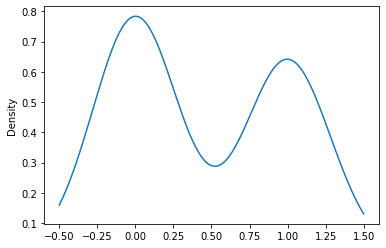

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'coinflips': coinflips})

df['coinflips'].plot.density()
plt.show()

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)